In [1]:
import jax
import jax.numpy as np
import numpy as onp
from lbi.pipeline.base import pipeline
from lbi.prior import SmoothedBoxPrior
import h5py
import limits_plots as lp
import corner
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
%matplotlib inline

/opt/homebrew/Caskroom/miniforge/base/envs/mssm/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
plot_dir = "../../plots/"

# Load in array
logger = None
hf = h5py.File('samples_and_results_NRE.h5', 'r')
samples = hf['samples'][:]
results = {}
for key in hf.keys():
    if key != 'samples':
        results[key] = hf[key][:]
hf.close()

In [39]:
plot_dir = "../../plots/"

# Load in array
logger = None
hf = h5py.File('samples_and_results_SNRE5.h5', 'r')
samplesSNRE5 = hf['samples'][:]
resultsSNRE5 = {}
for key in hf.keys():
    if key != 'samples':
        resultsSNRE5[key] = hf[key][:]
hf.close()

In [3]:
np.count_nonzero(~np.isnan(results['mhsm']))

DeviceArray(19266, dtype=int32)

In [31]:
print(np.sum((results['omega']  > lower_limits[0,0]) & (results['omega']  < upper_limits[0,0]))/np.count_nonzero(~np.isnan(results['omega'])))
print(np.sum((results['gmuon']  > lower_limits[0,1]) & (results['gmuon']  < upper_limits[0,1]))/np.count_nonzero(~np.isnan(results['gmuon'])))
print(np.sum((results['mhsm']  > lower_limits[0,2]) & (results['mhsm']  < upper_limits[0,2]))/np.count_nonzero(~np.isnan(results['mhsm'])))
print(np.sum((results['pval_xenon1T']  > lower_limits[0,3]))/np.count_nonzero(~np.isnan(results['pval_xenon1T'])))



0.013131943
0.4396346
0.9993252
0.41575834


In [32]:
print(np.sum((resultsSNRE5['omega']  > lower_limits[0,0]) & (resultsSNRE5['omega']  < upper_limits[0,0]))/np.count_nonzero(~np.isnan(resultsSNRE5['omega'])))
print(np.sum((resultsSNRE5['gmuon']  > lower_limits[0,1]) & (resultsSNRE5['gmuon']  < upper_limits[0,1]))/np.count_nonzero(~np.isnan(resultsSNRE5['gmuon'])))
print(np.sum((resultsSNRE5['mhsm']  > lower_limits[0,2]) & (resultsSNRE5['mhsm']  < upper_limits[0,2]))/np.count_nonzero(~np.isnan(resultsSNRE5['mhsm'])))
print(np.sum((resultsSNRE5['pval_xenon1T']  > lower_limits[0,3]))/np.count_nonzero(~np.isnan(resultsSNRE5['pval_xenon1T'])))



0.08519883
0.27504605
0.9794087
0.18678568


In [33]:
results['mneut1'] = onp.abs(results['mneut1'])

# Plot arguments 
lower_limits = onp.array([[0.09, 74e-11, 122.0, 2 * 0.02275]])
upper_limits = onp.array([[0.15, 428e-11, 128.0, 1.1]])
# lower_limits = onp.array([[0.0, 1e-15, 122.0, 1e-10]])
# upper_limits = onp.array([[1.10, 1.0, 128.0, 1.1]])
limits = onp.stack([lower_limits, upper_limits]).squeeze()
ranges = [
    [-2000, 2000],
    [-1000, 1000],
    [-2000, 2000],
    [400, 4000],
    [100, 4000],
    [100, 1000],
    [100, 4000],
    [100, 4000],
    [100, 1000],
    [100, 4000],
    [400, 4000],
    [1, 60],
    [-4000, 4000],
    [-4000, 4000],
    [-4000, 4000],
]
labels = [
    r"$\mu$",
    r"$M_1$",
    r"$M_2$",
    r"$M_3$",
    r"$M_{L_1}$",
    r"$M_{L_2}$",
    r"$M_{L_3}$",
    r"$M_{r_1}$",
    r"$M_{r_2}$",
    r"$M_{r_3}$",
    # r"$M_{Q_1}$",
    # r"$M_{Q_2}$",
    # r"$M_{Q_3}$",
    # r"$M_{u_1}$",
    # r"$M_{u_2}$",
    # r"$M_{u_3}$",
    # r"$M_{d_1}$",
    # r"$M_{d_2}$",
    # r"$M_{d_3}$",
    r"$M_A$",
    r"$\tan\beta$",
    r"$A_t$",
    r"$A_b$",
    r"$A_{\tau}$",
]
levels = [0.6827, 0.9545, 0.9973]


In [42]:
filtered_unitful_samples, filtered_results = lp.filter_observables(
    samples, results, limits
)

filtered_unitful_samples_SNRE5, filtered_resultsSNRE5 = lp.filter_observables(
    samplesSNRE5, resultsSNRE5, limits)

In [45]:
lp.plot_direct_detection_limits(results, filename="unfiltered_direct_detection.png")
lp.plot_direct_detection_limits(filtered_results, filename="direct_detection.png")

lp.plot_direct_detection_limits(resultsSNRE5, filename="unfiltered_direct_detection_SNRE5.png")
lp.plot_direct_detection_limits(filtered_resultsSNRE5, filename="direct_detection_SNRE5.png")

<Figure size 640x480 with 0 Axes>

In [27]:
lp.plot_mass_splitting(results, filename="unfiltered_LHC_mass_splitting_constraints.png")
lp.plot_mass_splitting(filtered_results)

<Figure size 640x480 with 0 Axes>

In [28]:
print(filtered_unitful_samples.shape[0]/samples.shape[0])

0.003468858401825057


/var/folders/qd/09mj47cx551c65glw6y47d6r0000gn/T/ipykernel_27570/3953985481.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 5, i+1)


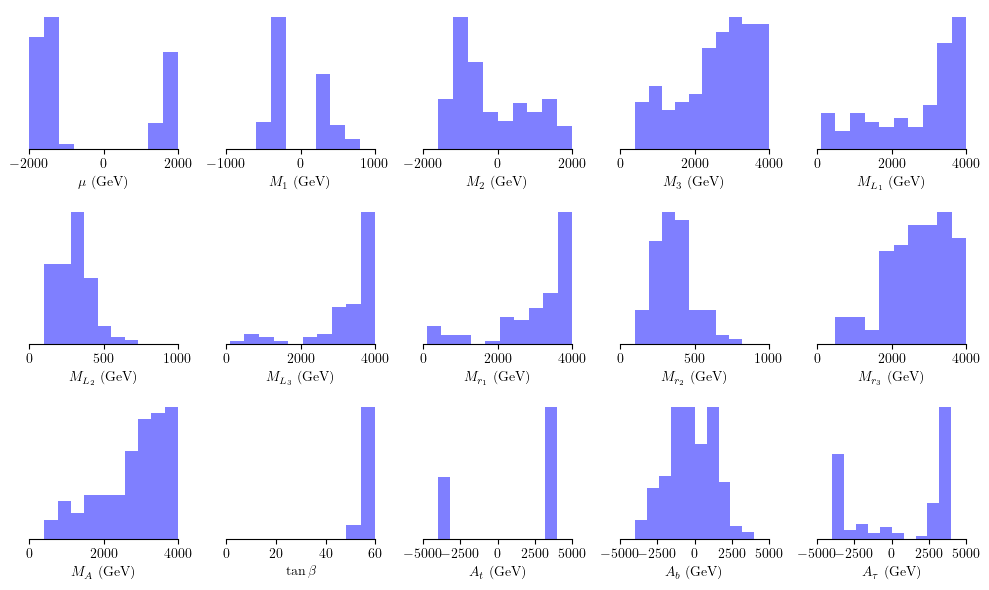

In [49]:
plt.subplots(figsize=(10, 6))
for i,label in enumerate(labels):
    plt.subplot(3, 5, i+1)
    # plt.hist(samples[:,i], color="darksalmon", bins=10, density=True, range=ranges[i])
    plt.hist(filtered_unitful_samples[:,i], color="blue", bins=10, density=True, alpha=0.5, range=ranges[i])
    # plt.hist(filtered_unitful_samples[:,i])
    if "tan" not in label:
        plt.xlabel(label + " (GeV)")
    else:
        plt.xlabel(label)
    plt.xlim(ranges[i])
    ax = plt.gca()
    ax.set_xticks(ax.get_xticks() + [0])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.get_yaxis().set_visible(False)
    # plt.box(False)
plt.tight_layout()

/var/folders/qd/09mj47cx551c65glw6y47d6r0000gn/T/ipykernel_27570/169639845.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 5, i+1)


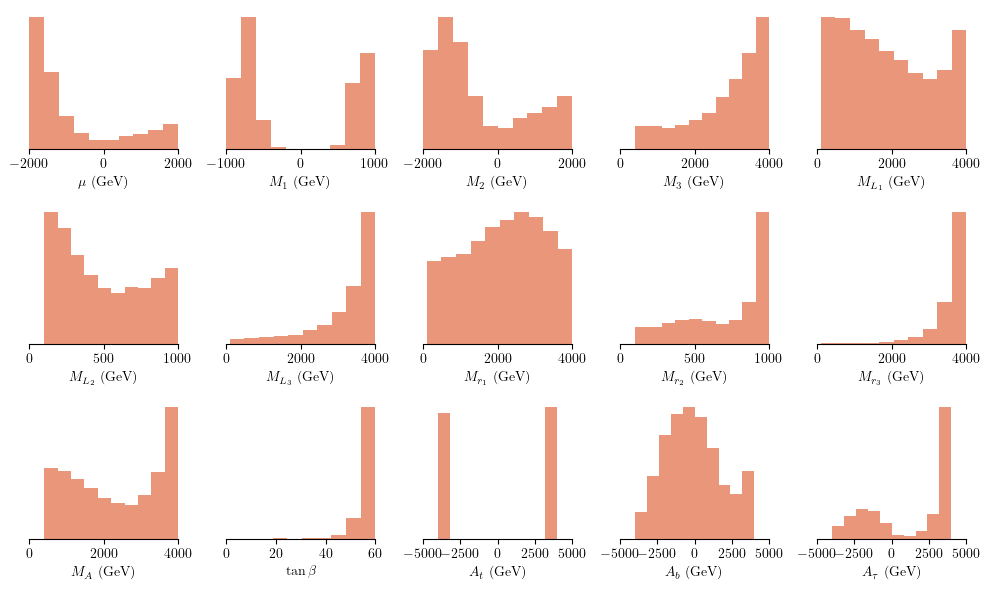

In [48]:
plt.subplots(figsize=(10, 6))
for i,label in enumerate(labels):
    plt.subplot(3, 5, i+1)
    plt.hist(samplesSNRE5[:,i], color="darksalmon", bins=10, density=True, range=ranges[i])
    plt.hist(filtered_unitful_samples_SNRE5[:,i], color="blue", bins=10, density=True, alpha=0.5, range=ranges[i])
    # plt.hist(filtered_unitful_samples[:,i])
    if "tan" not in label:
        plt.xlabel(label + " (GeV)")
    else:
        plt.xlabel(label)
    plt.xlim(ranges[i])
    ax = plt.gca()
    ax.set_xticks(ax.get_xticks() + [0])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.get_yaxis().set_visible(False)
    # plt.box(False)
plt.tight_layout()